Q_value for the first day is= 15.4
Optimal shares to sell everyday: [2, 0, 0, 0, 0, 0]
Q_value for the first day is= 2514.3242553924274
Optimal shares to sell everyday: [21, 13, 11, 8, 7, 0]
Q_value for the first day is= 2592.524584529175
Optimal shares to sell everyday: [19, 15, 9, 9, 8, 0]
Q_value for the first day is= 2594.069282342655
Optimal shares to sell everyday: [12, 12, 12, 11, 13, 0]
Q_value for the first day is= 2633.5218345474855
Optimal shares to sell everyday: [12, 13, 11, 11, 13, 0]
Q_value for the first day is= 2642.3198265002743
Optimal shares to sell everyday: [16, 8, 12, 10, 14, 0]
Q_value for the first day is= 2638.0851129839853
Optimal shares to sell everyday: [17, 8, 15, 10, 10, 0]
Q_value for the first day is= 2647.230478174414
Optimal shares to sell everyday: [12, 13, 9, 12, 13, 0]
Q_value for the first day is= 2663.5233933400195
Optimal shares to sell everyday: [10, 12, 16, 13, 9, 0]
Q_value for the first day is= 2628.5282497926573
Optimal shares to sell every

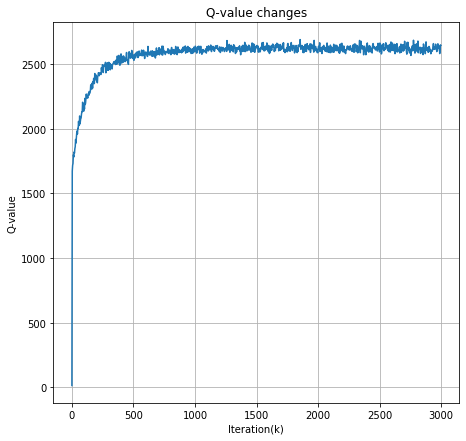

In [4]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

class TradeExecution():
    def __init__(self):
        self.iteration = 3000000
        
        self.T_size = 6 # length of Time
        self.P_size = 100 # Size of Spread of Prices
        self.N_size = 60 # Total number of shares to sell
        self.Start_Price = 80 # Bid Price at Start
        self.gamma = 1
        self.alpha = 0.1 # Stepsize
        self.epsilon = 0.5
        
    def build_qv_fun_dict(self) :
        # i : t, j : P_t, k : R_t, l: N_t, l's value: U_t
        Q = {(i, j, k): {l : 0 for l in range(self.N_size+1)} for i in range(self.T_size)\
             for j in range(self.P_size) for k in range(self.N_size+1)\
             } 
        return Q
    
    def build_action_dict(self):
        A = {(i, j, k): random.randint(0, k+1) for i in range(self.T_size)\
             for j in range(self.P_size) for k in range(self.N_size+1)}
        return A
        
        
    def simulator(self, Rt, Pt, Nt) -> (float, float, float):
        alpha=1
        error=np.random.binomial(10, 0.5, size=None)-5
        Pt = int(Pt - alpha * Nt - error)
        if Pt < 0:
            Pt = 0
        Rt = Rt - Nt
        reward = Nt * (Pt)

        return Rt, Pt, reward
        
    
    
    def Episode(self, Q, A, epsilon, method="Q-learning"):
                 
        #Set s0 as the starting state
        t = 0
        Pt = self.Start_Price
        Rt = self.N_size
                 
        best_action=max(Q[(t, Pt, Rt)], key = Q[(t, Pt, Rt)].get)
            
        # Apply Epsilon-Greedy Strategy here 
        if random.uniform(0, 1)<epsilon:
            A[(t, Pt, Rt)]= random.randint(0, Rt+1)
        else:
            A[(t, Pt, Rt)]= best_action 
                
        while t<self.T_size-1 and Rt > 0:  
                
            Nt = A[(t, Pt, Rt)] # Sample action a_t from policy π(st)
                
            #Simulate and observe reward rt and next state st+1
            Rt_next, Pt_next, reward= self.simulator(Rt, Pt, Nt)
                            
            t_next=t+1
                
            best_action=max(Q[(t_next, Pt_next, Rt_next)], \
                                  key=Q[(t_next, Pt_next, Rt_next)].get)
            
            if method == "Q-learning":
                Qmax = Q[(t_next, Pt_next, Rt_next)][best_action]
                Qnow = Q[(t, Pt, Rt)][Nt]
                Q[(t, Pt, Rt)][Nt]=Qnow+self.alpha*(reward\
                             +self.gamma*Qmax-Qnow)
            if method == "Sarsa":
                Nt_next = A[(t_next, Pt_next, Rt_next)]
                Qnext = Q[(t_next, Pt_next, Rt_next)][Nt_next]
                Q[(t, Pt, Rt)][Nt] = Qnow+\
                        self.alpha*(reward+self.gamma*Qnext-Qnow)
                
            #update S
            t = t_next
            Pt = Pt_next
            Rt = Rt_next
                
            if random.uniform(0, 1)<epsilon:
                A[(t, Pt, Rt)] = random.randint(0, Rt+1)
            else:
                A[(t, Pt, Rt)] = best_action 
        
        return Q, A
                
        
    def Algorithm(self, method):
        Q = self.build_qv_fun_dict()
        A = self.build_action_dict()
        #epsilon = 0.15
        
        iteration = []
        Q_plot = []
 
        
        for i in range(self.iteration):
            
            epsilon=1-i/self.iteration
            
            Q, A = self.Episode(Q, A, epsilon, "Q-learning")
            #print(Q)
            
            #Plotting 
            if i % (self.iteration/10) == 0:
                first_day_sell=max(Q[(0, self.Start_Price, self.N_size)], \
                    key=Q[(0, self.Start_Price, self.N_size)].get)
                print("Q_value for the first day is=", Q[(0, self.Start_Price, self.N_size)][first_day_sell])
    
                shares_sold_daily=[first_day_sell] 
                sell=first_day_sell
                remain=self.N_size-sell
                price=self.Start_Price-sell
                
                for j in range(1, self.T_size):
                    sell=max(Q[(j, price, remain)], \
                               key=Q[(j, price, remain)].get)
                    shares_sold_daily.append(sell)
                    remain=remain-sell
                    price=price-sell
                print("Optimal shares to sell everyday:", shares_sold_daily)
                
            if i % (self.iteration/1000)==0:
                
                iteration.append(i/1000)
                first_day_sell=max(Q[(0, self.Start_Price, self.N_size)], \
                        key=Q[(0, self.Start_Price, self.N_size)].get)
                Q_plot.append(Q[(0, self.Start_Price, self.N_size)][first_day_sell])
 
       
        plt.figure(figsize=(16,7))
        plt.subplot(121)
        plt.plot(iteration,Q_plot)
        plt.grid(True)
        plt.xlabel("Iteration(k)")
        plt.ylabel("Q-value")
        plt.title("Q-value changes")

        
        
obj = TradeExecution()
obj.Algorithm("Q-learning")

Q_value for the first day is= 135.70000000000002
Optimal shares to sell everyday: [59, 0, 0, 0, 0, 0]
Q_value for the first day is= 2463.4325650665364
Optimal shares to sell everyday: [24, 14, 9, 5, 8, 0]
Q_value for the first day is= 2590.105432941499
Optimal shares to sell everyday: [10, 19, 11, 12, 8, 0]
Q_value for the first day is= 2621.131959374587
Optimal shares to sell everyday: [16, 9, 12, 12, 11, 0]
Q_value for the first day is= 2615.477477615928
Optimal shares to sell everyday: [16, 13, 11, 11, 9, 0]
Q_value for the first day is= 2658.272713430967
Optimal shares to sell everyday: [13, 9, 15, 13, 10, 0]
Q_value for the first day is= 2613.329567376978
Optimal shares to sell everyday: [17, 11, 12, 9, 11, 0]
Q_value for the first day is= 2599.508119502667
Optimal shares to sell everyday: [14, 9, 13, 11, 13, 0]
Q_value for the first day is= 2581.898985390593
Optimal shares to sell everyday: [18, 9, 10, 11, 12, 0]
Q_value for the first day is= 2635.698973536163
Optimal shares to s

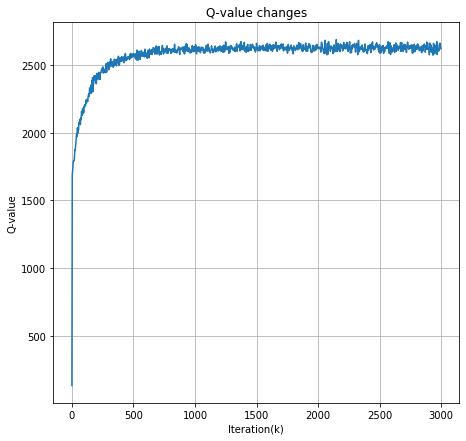

In [5]:
obj = TradeExecution()
obj.Algorithm("Sarsa")